In [ ]:
#importing required libraries and dataset
!pip install opendatasets
!pip install pandas
!pip install tensorflow

import opendatasets as od
import pandas
#uploaded data using kaggle website, as dataset is large to load locally.
od.download("https://www.kaggle.com/datasets/rayhanzamzamy/non-and-biodegradable-waste-dataset?rvi=1")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nanyaproject
Your Kaggle Key: ··········


100%|██████████| 1.86G/1.86G [01:24<00:00, 23.8MB/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define constants
IMAGE_SIZE = 150
BATCH_SIZE = 32
EPOCHS = 10

# Define paths to your dataset
train_dir = '/content/non-and-biodegradable-waste-dataset/TRAIN.2'
validation_dir = '/content/non-and-biodegradable-waste-dataset/TEST'

# Create image data generators with data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using the generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Create a CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // BATCH_SIZE
)


# Save the model
model.save('/content/drive/MyDrive/wasteClassificationModel.h5')


Found 59922 images belonging to 2 classes.
Found 16726 images belonging to 2 classes.
Epoch 1/10
1872/1872 [==============================] - 455s 239ms/step - loss: 0.3202 - accuracy: 0.8681 - val_loss: 0.4457 - val_accuracy: 0.7753
Epoch 2/10
1872/1872 [==============================] - 426s 228ms/step - loss: 0.2526 - accuracy: 0.8993 - val_loss: 0.5225 - val_accuracy: 0.7611
Epoch 3/10
1872/1872 [==============================] - 415s 222ms/step - loss: 0.2328 - accuracy: 0.9079 - val_loss: 0.4327 - val_accuracy: 0.8063
Epoch 4/10
1872/1872 [==============================] - 417s 223ms/step - loss: 0.2208 - accuracy: 0.9134 - val_loss: 0.4227 - val_accuracy: 0.8201
Epoch 5/10
1872/1872 [==============================] - 413s 221ms/step - loss: 0.2078 - accuracy: 0.9192 - val_loss: 0.4388 - val_accuracy: 0.8237
Epoch 6/10
1872/1872 [==============================] - 418s 223ms/step - loss: 0.2004 - accuracy: 0.9214 - val_loss: 0.8266 - val_accuracy: 0.7371
Epoch 7/10
1872/1872 [====

In [ ]:
# Evaluate the model on the validation data
validation_loss, validation_accuracy = model.evaluate(validation_generator)

# Print the validation accuracy
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")

523/523 [==============================] - 20s 38ms/step - loss: 0.5307 - accuracy: 0.8032
Validation Accuracy: 80.32%


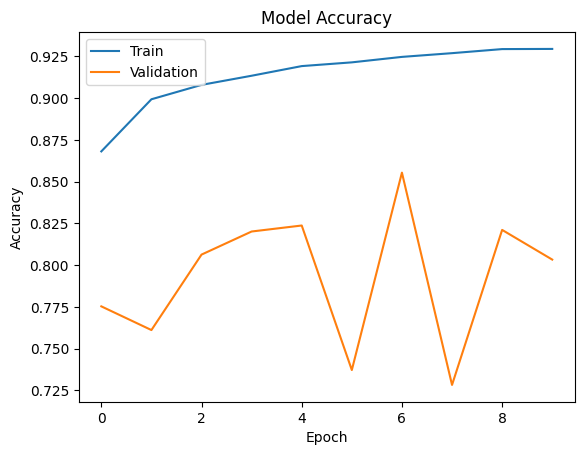

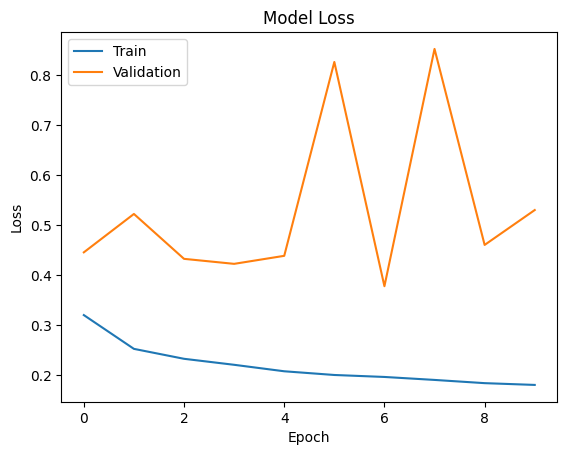

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()